In [1]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import pylab as pl
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

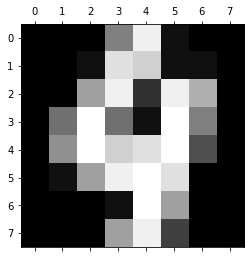

In [3]:
pl.gray()
pl.matshow(digits.images[14])
pl.show()

In [4]:
digits.images[14]

array([[ 0.,  0.,  0.,  8., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 14., 13.,  1.,  1.,  0.],
       [ 0.,  0., 10., 15.,  3., 15., 11.,  0.],
       [ 0.,  7., 16.,  7.,  1., 16.,  8.,  0.],
       [ 0.,  9., 16., 13., 14., 16.,  5.,  0.],
       [ 0.,  1., 10., 15., 16., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0., 10., 15.,  4.,  0.,  0.]])

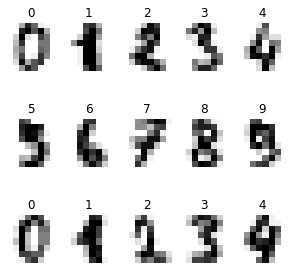

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize = (5,5))
for index, (image,label) in enumerate(images_and_labels[:15]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)


In [6]:
n_samples  = len(digits.images)
print(n_samples)

1797


In [7]:
X = digits.images.reshape((n_samples, -1))
y = digits.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
print(X_test.shape)


(1347, 64)
(450, 64)


In [9]:
model_linear = svm.SVC(kernel='linear',degree=3, gamma='scale')
model_linear.fit(X_train,y_train)
y_pred = model_linear.predict(X_test)


In [10]:
model_linear.score(X_test, y_test)

0.9688888888888889

In [11]:
model_RBF = svm.SVC(degree=3, gamma = 'scale',kernel='rbf')
model_RBF.fit(X_train, y_train)
y_pred2 = model_RBF.predict(X_test)
model_RBF.score(X_test, y_test)

0.9822222222222222

In [12]:
from sklearn.metrics import classification_report
predictions = model_linear.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       0.93      1.00      0.96        39
           2       1.00      1.00      1.00        58
           3       0.97      0.97      0.97        38
           4       1.00      0.98      0.99        48
           5       0.90      1.00      0.95        38
           6       1.00      0.98      0.99        53
           7       0.97      1.00      0.99        36
           8       0.95      0.89      0.92        45
           9       0.96      0.89      0.93        56

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

